In [1]:
from gp_2D import *

In [2]:
input_file = '../training_results/2D/train_inputs_log.json'
var_file = '../training_results/2D/train_outputs_log_var.json'
output_file = '../training_results/2D/train_outputs_log_mean.json'
output_type = 'T'


In [3]:
gp = LPI_GP_2D(input_file=input_file, output_file=output_file,\
               output_type=output_type, var_file=var_file, train_frac = 0.01)


In [4]:
gp.set_training_data()

In [5]:
gp.optimise_noise_GP()

l1 =  0.07742636826811278 l2 =  0.2782559402207126 var =  0.07742636826811278


In [6]:
gp.optimise_GP()

l1 =  1.6681005372000592 l2 =  100.0 var =  0.15832234876474738


In [7]:
N = 1000
Ln_300 = np.ones(N)*300e-6
Ln_500 = np.ones(N)*500e-6
Ln_1000 = np.ones(N)*1000e-6
I = np.geomspace(1e14, 1e16, N)
X_300 = []
X_500 = []
X_1000 = []
for i in range(N):
        X_300.append([I[i], Ln_300[i]])
        X_500.append([I[i], Ln_500[i]])
        X_1000.append([I[i], Ln_1000[i]])

X_300 = np.array(X_300)
X_500 = np.array(X_500)
X_1000 = np.array(X_1000)

In [8]:
Y_300, Var_epi_300, Var_noise_300 = gp.GP_predict(X_300, get_var=True)
Y_500, Var_epi_500, Var_noise_500 = gp.GP_predict(X_500, get_var=True)
Y_1000, Var_epi_1000, Var_noise_1000 = gp.GP_predict(X_1000, get_var=True)

In [9]:
err_300 = 2.0*np.sqrt(Var_epi_300 + Var_noise_300)
err_500 = 2.0*np.sqrt(Var_epi_500 + Var_noise_500)
err_1000 = 2.0*np.sqrt(Var_epi_300 + Var_noise_1000)

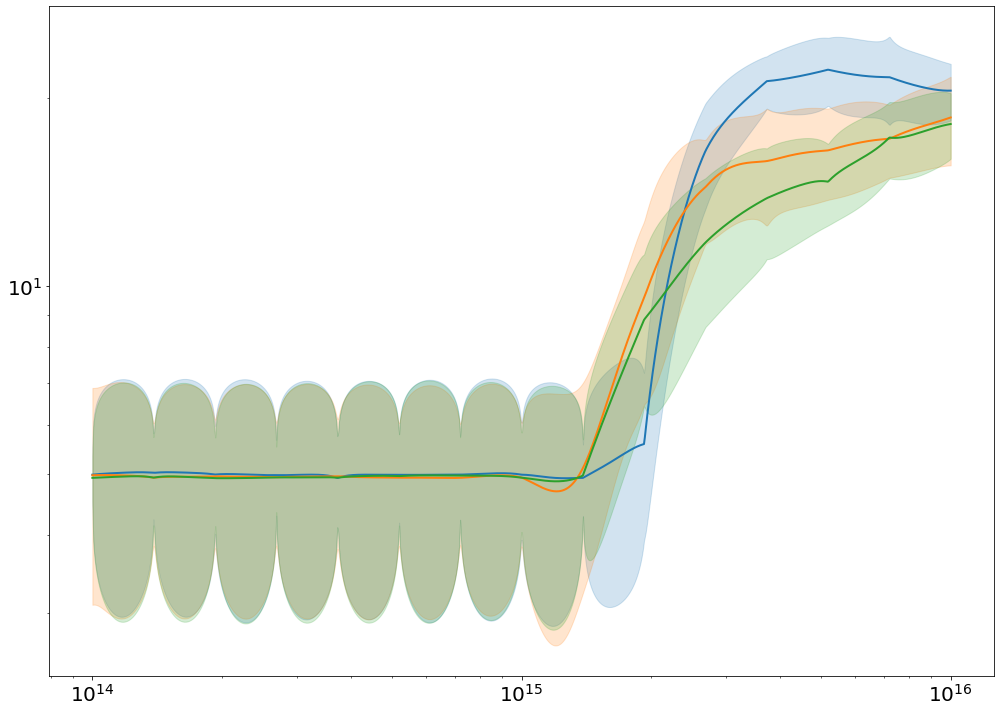

In [10]:
plt.loglog(X_300[:,0].flatten(), Y_300.flatten(), color = 'C0')
plt.plot(X_500[:,0].flatten(), Y_500.flatten(), color = 'C1')
plt.plot(X_1000[:,0].flatten(), Y_1000.flatten(), color = 'C2')

plt.fill_between(X_300[:,0].flatten(), Y_300-err_300, Y_300+err_300, alpha = 0.2, color = 'C0')
plt.fill_between(X_500[:,0].flatten(), Y_500.flatten()-err_500, Y_500.flatten()+err_500, alpha = 0.2, color = 'C1')
plt.fill_between(X_1000[:,0].flatten(), Y_1000.flatten()-err_1000, Y_1000.flatten()+err_1000, alpha = 0.2, color = 'C2')